<a href="https://colab.research.google.com/github/sujannepal/cat-dog-classification-cnn/blob/main/dog_vs_cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Dataset: https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:05<00:00, 257MB/s]
100% 1.06G/1.06G [00:05<00:00, 223MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 84s 117ms/step - loss: 1.3161 - accuracy: 0.5961 - val_loss: 0.6277 - val_accuracy: 0.6468
Epoch 2/10
625/625 [==============================] - 72s 115ms/step - loss: 0.5686 - accuracy: 0.7073 - val_loss: 0.7323 - val_accuracy: 0.5142
Epoch 3/10
625/625 [==============================] - 75s 119ms/step - loss: 0.4878 - accuracy: 0.7678 - val_loss: 0.6121 - val_accuracy: 0.6650
Epoch 4/10
625/625 [==============================] - 72s 114ms/step - loss: 0.4386 - accuracy: 0.8055 - val_loss: 0.5316 - val_accuracy: 0.7364
Epoch 5/10
625/625 [==============================] - 72s 115ms/step - loss: 0.3746 - accuracy: 0.8357 - val_loss: 0.4468 - val_accuracy: 0.7868
Epoch 6/10
625/625 [==============================] - 72s 115ms/step - loss: 0.3008 - accuracy: 0.8741 - val_loss: 0.4967 - val_accuracy: 0.7778
Epoch 7/10
625/625 [==============================] - 72s 114ms/step - loss: 0.2363 - accuracy: 0.9045 - val_loss: 0.8196 - val_ac

In [12]:
import matplotlib.pyplot as plt

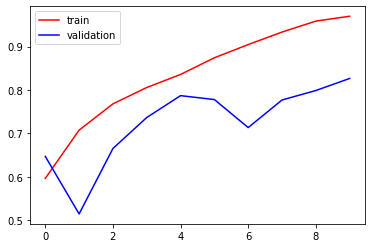

In [13]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

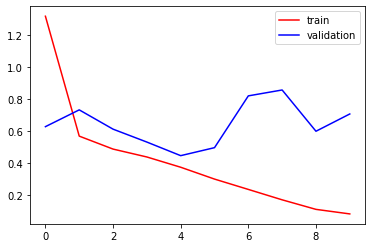

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
import cv2

In [16]:
test_img = cv2.imread('/content/cat1.PNG')

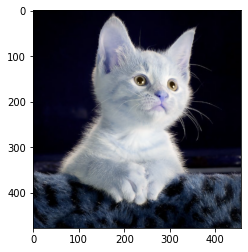

In [17]:
plt.imshow(test_img)

In [18]:
test_img.shape

(478, 457, 3)

In [19]:
test_img = cv2.resize(test_img,(256,256))

In [20]:
test_input = test_img.reshape((1,256,256,3))

In [21]:
model.predict(test_input)

1/1 [==============================] - 0s 241ms/step


array([[0.]], dtype=float32)

In [23]:
test_img2 = cv2.imread('/content/dog1.PNG')

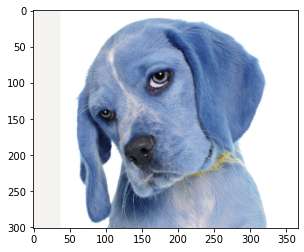

In [24]:
plt.imshow(test_img2)

In [25]:
test_img2.shape

(301, 366, 3)

In [26]:
test_img2 = cv2.resize(test_img2,(256,256))

In [27]:
test_input2 = test_img2.reshape((1,256,256,3))

In [28]:
model.predict(test_input2)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)